delta_O3 dimensions before: ('lev', 'lat', 'lon')
delta_O3 shape before: (1, 181, 360)
delta_O3 dimensions after: ('lat', 'lon')
delta_O3 shape after: (181, 360)


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


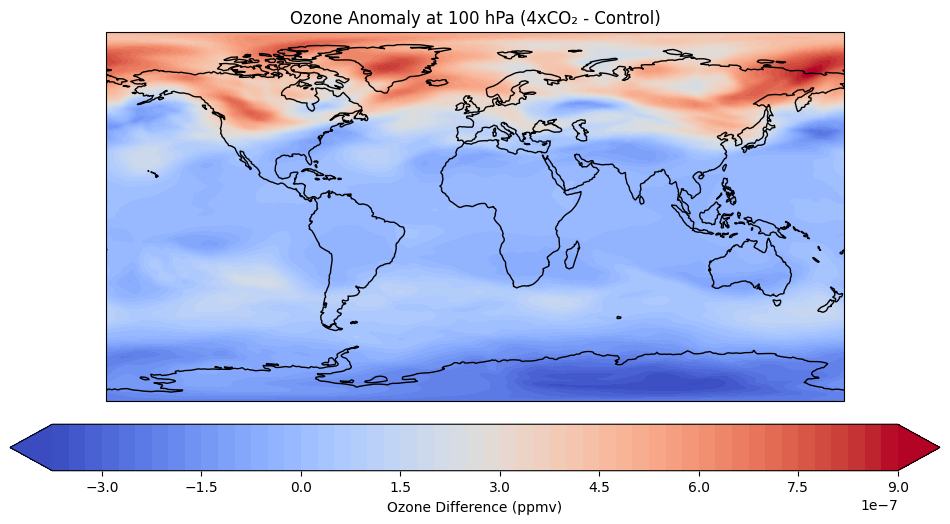

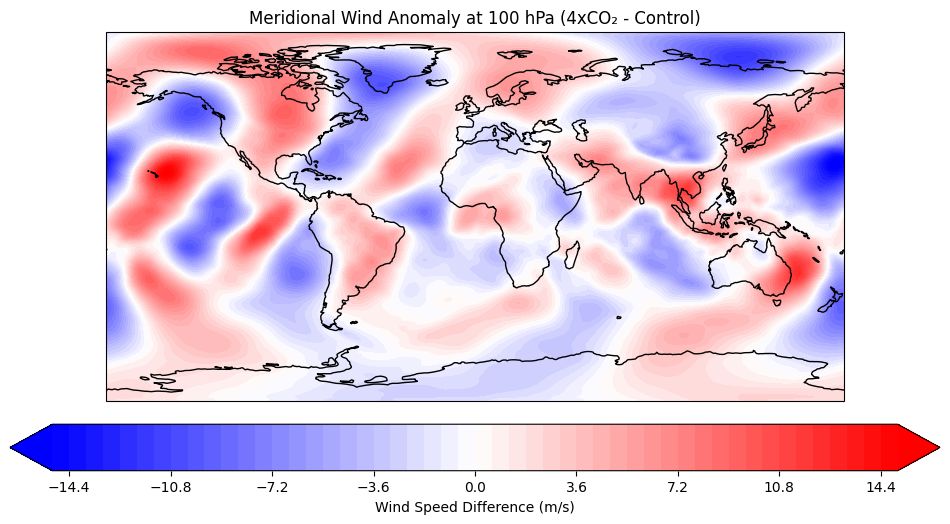

In [4]:
# Install necessary libraries (if not already installed)
!pip install netCDF4 xarray numpy matplotlib cartopy

# Import libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load the data files
O3_control_file = 'O3_100hPa_control.nc4'
O3_co2_file = 'O3_100hPa_4xco2.nc4'
V_control_file = 'V_100hPa_control.nc4'
V_co2_file = 'V_100hPa_4xco2.nc4'

# Load the datasets without decoding times
O3_control = xr.open_dataset(O3_control_file, decode_times=False)
O3_co2 = xr.open_dataset(O3_co2_file, decode_times=False)
V_control = xr.open_dataset(V_control_file, decode_times=False)
V_co2 = xr.open_dataset(V_co2_file, decode_times=False)

# Extract the data variables
O3_control_data = O3_control['O3']
O3_co2_data = O3_co2['O3']
V_control_data = V_control['V']
V_co2_data = V_co2['V']

# Handle the time dimension
if 'time' in O3_control_data.dims:
    O3_control_data = O3_control_data.isel(time=0)
    O3_co2_data = O3_co2_data.isel(time=0)
    V_control_data = V_control_data.isel(time=0)
    V_co2_data = V_co2_data.isel(time=0)

# Inspect the dimensions and shapes
print("delta_O3 dimensions before:", (O3_co2_data - O3_control_data).dims)
print("delta_O3 shape before:", (O3_co2_data - O3_control_data).shape)

# Compute the anomalies
delta_O3 = O3_co2_data - O3_control_data
delta_V = V_co2_data - V_control_data

# Handle extra dimensions
delta_O3 = delta_O3.squeeze()
delta_V = delta_V.squeeze()

# Verify dimensions after squeezing
print("delta_O3 dimensions after:", delta_O3.dims)
print("delta_O3 shape after:", delta_O3.shape)

# Visualize the ozone anomaly
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ozone_plot = ax.contourf(
    delta_O3['lon'], delta_O3['lat'], delta_O3,
    levels=60, transform=ccrs.PlateCarree(),
    cmap='coolwarm', extend='both'
)

ax.coastlines()
ax.set_title('Ozone Anomaly at 100 hPa (4xCO₂ - Control)')
cbar = plt.colorbar(ozone_plot, orientation='horizontal', pad=0.05)
cbar.set_label('Ozone Difference (ppmv)')  # Adjust units as necessary
plt.show()

# Visualize the meridional wind anomaly
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

wind_plot = ax.contourf(
    delta_V['lon'], delta_V['lat'], delta_V,
    levels=60, transform=ccrs.PlateCarree(),
    cmap='bwr', extend='both'
)

ax.coastlines()
ax.set_title('Meridional Wind Anomaly at 100 hPa (4xCO₂ - Control)')
cbar = plt.colorbar(wind_plot, orientation='horizontal', pad=0.05)
cbar.set_label('Wind Speed Difference (m/s)')  # Adjust units as necessary
plt.show()


# ***STEPS:***

**Data Acquisition:**

We worked with NASA's GEOSCCM simulation data focused on atmospheric conditions.
Specifically used four NetCDF files:

1. O3_100hPa_control.nc4: Ozone data under control CO₂ levels.

2. O3_100hPa_4xco2.nc4: Ozone data under quadrupled CO₂ levels.

3. V_100hPa_control.nc4: Meridional wind data under control CO₂ levels.

4. V_100hPa_4xco2.nc4: Meridional wind data under quadrupled CO₂ levels.

**Data Processing:**

1. Loaded the datasets using Python libraries (xarray, numpy, matplotlib, cartopy).

2. Resolved issues with time dimensions and extra dimensions in the data.

3. Used .isel(time=0) to select the first time point.

4. Applied .squeeze() to remove singleton dimensions.

Computed anomalies by subtracting the control data from the 4xCO₂ data:

1. Ozone Anomaly: delta_O3 = O3_co2_data - O3_control_data

2. Meridional Wind Anomaly: delta_V = V_co2_data - V_control_data

**Data Visualization:**

1. Created global contour maps to display the anomalies.

2. Ozone Anomaly Map: Showed changes in ozone concentration.

3. Wind Anomaly Map: Illustrated changes in meridional wind patterns.

4. Used appropriate color maps and added coastlines for clarity.

5. Labeled the plots with titles and color bars indicating units.

**Connecting Atmospheric Changes to Agriculture:**

1. Analyzed how increased CO₂ levels affect the stratosphere, which can impact agricultural conditions.

2. Highlighted potential effects on crop health due to changes in ozone (affecting UV radiation) and wind patterns (influencing weather).

**Innovative Use of NASA Data:**

1. Utilized complex climate simulation data in a novel way to address agricultural concerns.

2. Worked within the constraints of a single dataset to derive meaningful insights.

**Problem-Solving Skills:**

1. Overcame technical challenges with the data:

2. Managed time dimension issues that caused errors.

3. Handled extra dimensions to make the data suitable for plotting.

4. Adapted code to match the specific structure of our files.

**Clear and Informative Visualizations:**

1. Transformed raw data into easy-to-understand maps.

2. Provided visual tools that can help others grasp the potential impacts on agriculture.

**Interdisciplinary Approach:**

1. Bridged the gap between atmospheric science and agriculture.

2. Offered a unique perspective by linking stratospheric phenomena to ground-level agricultural outcomes.


In [21]:
# Install necessary libraries
!pip install folium netCDF4 xarray numpy matplotlib

# Import libraries
import folium
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

# Load the data files
O3_control_file = 'O3_100hPa_control.nc4'
O3_co2_file = 'O3_100hPa_4xco2.nc4'
V_control_file = 'V_100hPa_control.nc4'
V_co2_file = 'V_100hPa_4xco2.nc4'

# Load the datasets without decoding times
O3_control = xr.open_dataset(O3_control_file, decode_times=False)
O3_co2 = xr.open_dataset(O3_co2_file, decode_times=False)
V_control = xr.open_dataset(V_control_file, decode_times=False)
V_co2 = xr.open_dataset(V_co2_file, decode_times=False)

# Extract the data variables
O3_control_data = O3_control['O3']
O3_co2_data = O3_co2['O3']
V_control_data = V_control['V']
V_co2_data = V_co2['V']

# Handle the time dimension
if 'time' in O3_control_data.dims:
    O3_control_data = O3_control_data.isel(time=0)
    O3_co2_data = O3_co2_data.isel(time=0)

if 'time' in V_control_data.dims:
    V_control_data = V_control_data.isel(time=0)
    V_co2_data = V_co2_data.isel(time=0)

# Compute the anomalies
delta_O3 = O3_co2_data - O3_control_data
delta_V = V_co2_data - V_control_data

# Handle extra dimensions
delta_O3 = delta_O3.squeeze()
delta_V = delta_V.squeeze()

# Convert the DataArrays to DataFrames
delta_O3_df = delta_O3.to_dataframe(name='Ozone Anomaly').reset_index()
delta_V_df = delta_V.to_dataframe(name='Wind Anomaly').reset_index()

# Define a function to map anomaly values to colors
def get_color(value, vmin, vmax, cmap_name):
    norm = (value - vmin) / (vmax - vmin)
    cmap = plt.colormaps[cmap_name]  # Updated to use the new Matplotlib syntax
    rgba = cmap(norm)
    return matplotlib.colors.rgb2hex(rgba)

# Create the Folium map for Ozone Anomaly
m_ozone = folium.Map(location=[0, 0], zoom_start=2)

# Get min and max values for normalization
vmin_o3 = delta_O3_df['Ozone Anomaly'].min()
vmax_o3 = delta_O3_df['Ozone Anomaly'].max()

# Add points to the Ozone Anomaly map
for _, row in delta_O3_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color=get_color(row['Ozone Anomaly'], vmin_o3, vmax_o3, 'coolwarm'),
        fill=True,
        fill_color=get_color(row['Ozone Anomaly'], vmin_o3, vmax_o3, 'coolwarm'),
        fill_opacity=0.7,
        popup=f"Ozone Anomaly: {row['Ozone Anomaly']:.2f}"
    ).add_to(m_ozone)

# Display the Ozone Anomaly map
print("Ozone Anomaly Map:")
m_ozone

# Create the Folium map for Meridional Wind Anomaly
m_wind = folium.Map(location=[0, 0], zoom_start=2)

# Get min and max values for normalization
vmin_wind = delta_V_df['Wind Anomaly'].min()
vmax_wind = delta_V_df['Wind Anomaly'].max()

# Add points to the Wind Anomaly map
for _, row in delta_V_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color=get_color(row['Wind Anomaly'], vmin_wind, vmax_wind, 'bwr'),
        fill=True,
        fill_color=get_color(row['Wind Anomaly'], vmin_wind, vmax_wind, 'bwr'),
        fill_opacity=0.7,
        popup=f"Wind Anomaly: {row['Wind Anomaly']:.2f}"
    ).add_to(m_wind)

# Display the Wind Anomaly map
print("Meridional Wind Anomaly Map:")
m_wind



In [20]:
# Save the Ozone Anomaly map to an HTML file
m_ozone.save('ozone_anomaly_map.html')

# Save the Wind Anomaly map to an HTML file
m_wind.save('wind_anomaly_map.html')
